<a href="https://colab.research.google.com/github/frantanu/transformers-and-empathy-in-journaling/blob/main/Zero_Shot_Classification_to_Support_Emotional_Intelligence_in_a_Journaling_Context.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zero Shot Classification to Support Emotional Intelligence in a Journaling Context

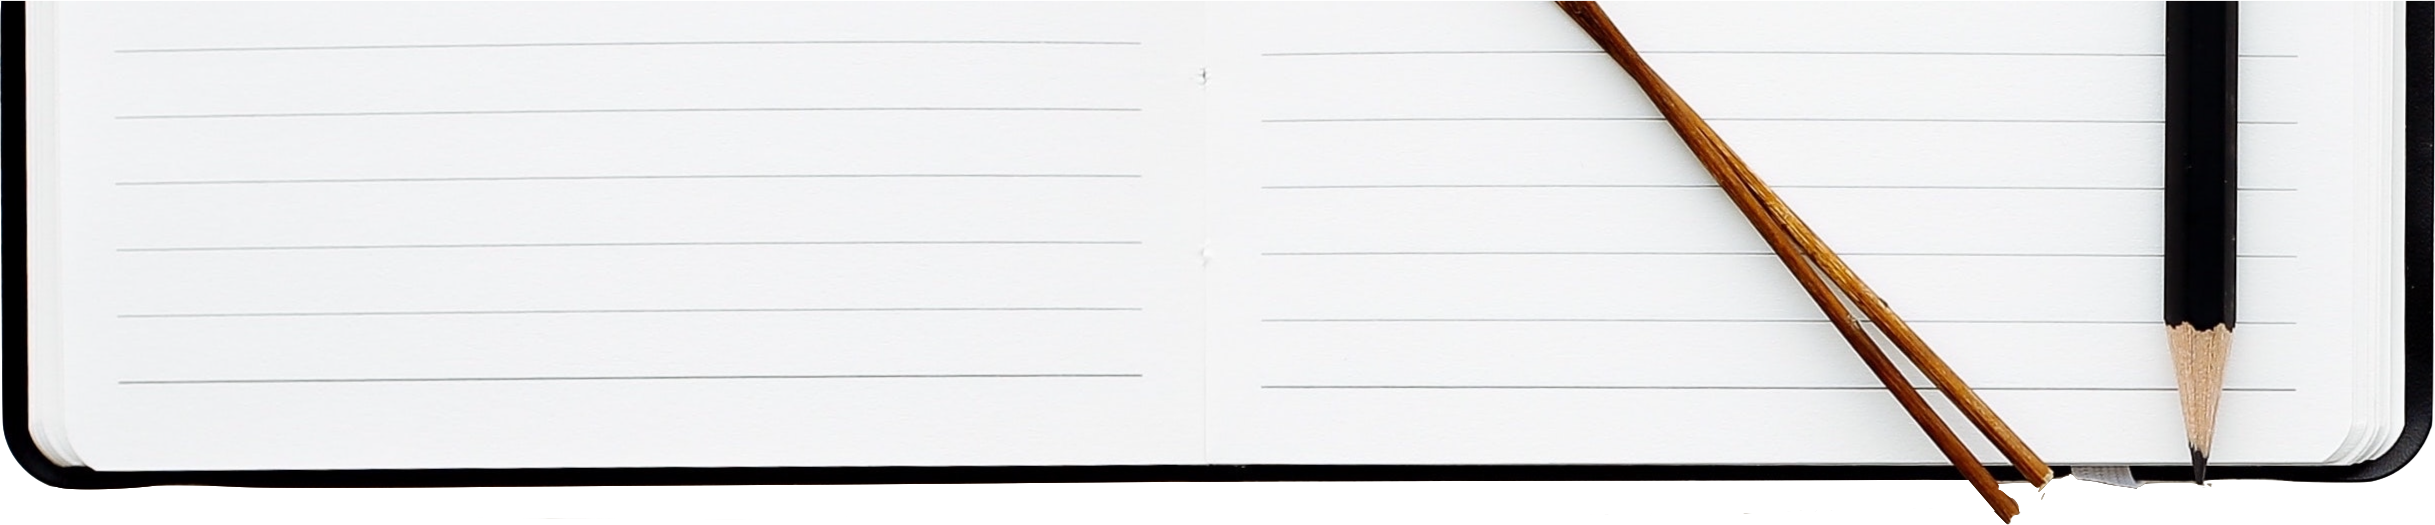

### Quickstart

To quickly test the application, run the two cells below and folow the output URL.

In [1]:
!git clone "https://github.com/frantanu/transformers-and-empathy-in-journaling.git"

%cd /content/transformers-and-empathy-in-journaling

!pip install streamlit -q
!pip install transformers -q
!npm install localtunnel

fatal: destination path 'transformers-and-empathy-in-journaling' already exists and is not an empty directory.
/content/transformers-and-empathy-in-journaling
npm WARN saveError ENOENT: no such file or directory, open '/content/transformers-and-empathy-in-journaling/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/transformers-and-empathy-in-journaling/package.json'
npm WARN transformers-and-empathy-in-journaling No description
npm WARN transformers-and-empathy-in-journaling No repository field.
npm WARN transformers-and-empathy-in-journaling No README data
npm WARN transformers-and-empathy-in-journaling No license field.

+ localtunnel@2.0.1
updated 1 package and audited 36 packages in 0.558s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [2]:
!streamlit run streamlit_app.py &>/dev/null&
!npx localtunnel --port 8501

npx: installed 22 in 2.878s
your url is: https://dry-otter-52.loca.lt
^C


Discussion

### Github Setup

The below loads Github API keys from your Google Drive and clones a target repository. You may skip this section.

In [13]:
import json
 
with open("/content/drive/MyDrive/Git/git.json", "r") as f:
  parsed_json = json.load(f)
 
GIT_USER_NAME = parsed_json["GIT_USER_NAME"]
GIT_TOKEN = parsed_json["GIT_TOKEN"]
GIT_USER_EMAIL = parsed_json["GIT_USER_EMAIL"]

GIT_REPOSITORY = "transformers-and-empathy-in-journaling"
GIT_PATH = (
        f"https://{GIT_TOKEN}@github.com/{GIT_USER_NAME}/{GIT_REPOSITORY}.git"
    ) 

!git clone "{GIT_PATH}"
 


Cloning into 'transformers-and-empathy-in-journaling'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 28 (delta 9), reused 17 (delta 2), pack-reused 0
Unpacking objects: 100% (28/28), done.


In [3]:
%cd /content/transformers-and-empathy-in-journaling
%ls

/content/transformers-and-empathy-in-journaling
header.png  LICENSE  README.md  requirements.txt  streamlit_app.py


In [4]:
!git config --global user.email "{GIT_USER_EMAIL}"
!git config --global user.name "{GIT_USER_NAME}"
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [11]:
!git commit requirements.txt -m "updated"

[main 543e56c] updated
 1 file changed, 1 deletion(-)


In [12]:
!git push origin

Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 300 bytes | 300.00 KiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/frantanu/transformers-and-empathy-in-journaling.git
   46a3dd8..543e56c  main -> main


## Implementation

We use [Huggingface transformer library](https://huggingface.co/)  to implement a zero shot classification model with our custom list of labels.

To test the model, we build a simple web application with  [Streamlit](https://streamlit.io/) and conveniently host it from this very notebook.

For better serving capabilities, the script (`streamlit_app.py`) can be easily used to host the application with numerous hosting services such as [AWS](https://aws.amazon.com/free/?trk=ps_a131L0000085EJfQAM&trkCampaign=acq_paid_search_brand&sc_channel=ps&sc_campaign=acquisition_UK&sc_publisher=google&sc_category=core-main&sc_country=UK&sc_geo=EMEA&sc_outcome=Acquisition&sc_detail=aws&sc_content=Brand_Core_aws_e&sc_matchtype=e&sc_segment=433803620858&sc_medium=ACQ-P|PS-GO|Brand|Desktop|SU|Core-Main|Core|UK|EN|Text&s_kwcid=AL!4422!3!433803620858!e!!g!!aws&ef_id=Cj0KCQjw2tCGBhCLARIsABJGmZ4PMdmkPOQxvEVSfk2PsgUdclJytk6cew0kc4rlQi-Pes_niDoIHGUaAnTyEALw_wcB:G:s&s_kwcid=AL!4422!3!433803620858!e!!g!!aws), [Heroku](https://www.heroku.com/) or [Streamlit](https://streamlit.io/) (invite required at the time of writing).


### Building The Model With A High Level 🤗  Pipeline

In [6]:
!pip install transformers -q

     |████████████████████████████████| 2.5MB 3.2MB/s 
     |████████████████████████████████| 901kB 28.4MB/s 
     |████████████████████████████████| 3.3MB 39.5MB/s 


In [7]:
from transformers import pipeline

Defining labels and testing a journaling input sequence:

In [30]:
classifier = pipeline("zero-shot-classification")
model = classifier(
    sequences = "Be happy. There are so many things to be thankful for. Ask when you need help. No one can read your mind. Time won't stop for you. Worrying and stressing is simply a waste of time. Nothing will change your situation more than changing your attitude. Perspective is everything. Be thankful for your struggles, because there is a lesson to be learned in the end of it.",
    candidate_labels=["encouraging", "cautious", "positive", "negative", "upbeat", "thankful", "forward-looking", "neutral", "sad"]
)

Formating the output:

In [62]:
first = model["labels"][0]
second = model["labels"][1]
output = f"Your letter seems quite {first} and {second}. What do you think?"
output

'Your letter seems quite thankful and encouraging. What do you think?'

### Building The Streamlit Application

The following script builds a Streamlit webapp around our zero shot classification transformer (To be saved in a separate file `streamlit_app.py`).

In [ ]:
# import streamlit as st
# from transformers import pipeline
# from PIL import Image

# @st.cache(allow_output_mutation=True)
# def load_model():
#   model = pipeline("zero-shot-classification")
#   return model

# cl = load_model()
# image = Image.open('header.png')
# st.image(image)
# st.title("Zero Shot Classification to Support Emotional Intelligence in a Journaling Context")
# sequences = st.text_area('Write a short letter to your future self here:', height=30)
# button = st.button("Done")
# with st.spinner("Empathy Engine Running..."):
#     if button and sequences:
#         mod = cl(sequences=sequences, candidate_labels=["encouraging", "cautious", "positive", "negative", "upbeat", "thankful", "forward-looking", "neutral", "sad"])
#         first = mod["labels"][0]
#         second = mod["labels"][1]
#         output = f"Your letter seems quite **{first}** and **{second}**. What do you think?"
#         st.markdown(output)

### Hosting The App In A Colab Instance With Localtunnel



The cell below will host `streamlit_app.py` (located in your active directory) inside this Colab instance and provide you with a hyperlink to the application (this will disconnect as soon as the cell stops running).

In [17]:
!pip install streamlit -q
!npm install localtunnel
!streamlit run streamlit_app.py &>/dev/null&
!npx localtunnel --port 8501

npm WARN saveError ENOENT: no such file or directory, open '/content/transformers-and-empathy-in-journaling/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/transformers-and-empathy-in-journaling/package.json'
npm WARN transformers-and-empathy-in-journaling No description
npm WARN transformers-and-empathy-in-journaling No repository field.
npm WARN transformers-and-empathy-in-journaling No README data
npm WARN transformers-and-empathy-in-journaling No license field.

+ localtunnel@2.0.1
updated 1 package and audited 36 packages in 0.532s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities

npx: installed 22 in 2.89s
your url is: https://sharp-gecko-68.loca.lt
^C
